# Can You Find The Best Dungeons & Dragons Strategy?

Adam Dachowicz.

Original 538 "Riddler" question [here](https://fivethirtyeight.com/features/can-you-find-the-best-dungeons-dragons-strategy/), posted May 15, 2020. As a big fan of DnD, and quick brain teasers on Saturdays, I thought this would be a fun riddle to tackle:

In DnD, the outcome of almost every action players take is decided by a roll of a 20-sided die. Sometimes, however, DM's mix it up by combining the rolls of two 20-sided dice: let rolling with advantage mean rolling two d20's (20-sided dice), and taking the higher result. Similarly, rolling with disadvantage means rolling two d20's and taking the worse result. In DnD, the DM can grant advantage or impose disadvantage to reflect a better-than or worse-than usual chance of success when, say, jumping over pits or stabbing trolls.

Here we are trying to determine which of the following twists on these rules gives the better expected result: rolling a d20 with advantage twice and taking the worse result (disadvantage of advantage), or rolling with disadvantage twice and taking the better result (advantage of disadvantage). 

This is a nice exercise in probability. First, let's work out the probability of rolling $N$, $1 \leq N \leq 20$ when rolling with advantage and distadvantage (this will be helpful later!). We'll let $P_{ADV}(N)$ denote the probabilty of rolling N with advantage, and similarly $P_{DIS}(N)$ denotes the probability of rolling N with disadvantage. Since we need to roll two dice, we will call the result for the first die A, and the result for the other die B.

## Probability of an Outcome with Advantage

First, $P_{ADV}(N)$. In what cases would an advantage roll result in value N? To roll a value of N with advantage, an event in one of three sets must occur: (i) $\{A = N, B < N\}$, (ii) $\{A < N, B = N\}$, or (iii) $\{A = B = N\}$. That is, either we have our best result N from the first die, the best result N from the second die, or we have identical results N on both dice. The probability of an event in set (i) is, with fair dice:
$$P(A = N, B < N) = P(A = N)P(B < N) \; \; \mathrm{(indep. events)}$$
$$ = P(A = N) \sum_{k=1}^{N-1}P(B=k)$$
$$ = \frac{1}{20}\frac{N-1}{20} = \frac{N-1}{400}. $$ 
The probability of an event in set (ii) is the same as set (i) since A and B are independent and identically distributed random variables. For set (iii), assuming our dice are fair, we have
$$ P(A=B=N) = P(A=N)P(B=N) = \frac{1}{400}.$$ 
Adding this all up, we have that rolls with advantage are drawn from the distribution with probability mass function
$$f_{ADV}(N) = \frac{N-1}{200} + \frac{1}{400}. \; \; \mathrm{(Equ. 1)}$$

Of course, the expected outcome is then just $E[f_{ADV}(N)] = \sum_{N=1}^{20}Nf_{ADV}(N)$.

## Probability of an Outcome with Disadvantage

We follow a similar approach to find $P_{DIS}(N)$. To roll a value of N with disadvantage, an event in one of three sets must occur: (i) $\{A = N, B > N\}$, (ii) $\{A > N, B = N\}$, or (iii) $\{A = B = N\}$. Here, either we have the worse result N on the first die, the worse result on the second die, or identical results. The probability of an event in set (i) is:
$$ P(A=N)P(B > N) = P(A = N) \sum_{k=N+1}^{20}P(B=k) = \frac{1}{20} \frac{20-N}{20} = \frac{20-N}{400}. $$
As before,the probability of an event in set (ii) is the same as set (i). For set (iii), we have the same "identical results" probability as for the advantage case. So, adding these three cases together we have that rolls with disadvantage follow the distribution with probability mass function
$$ f_{DIS}(N) = \frac{20-N}{200} + \frac{1}{400}. \; \; \mathrm{(Equ. 2)}$$
...and the expected outcome is just $E[f_{DIS}(N)] = \sum_{N=1}^{20}Nf_{DIS}(N)$.

## Visualizing Advantage and Disadvantage

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Expectation of advantage: 13.825
Expectation of disadvantage: 7.175
Confirm probs. sum to 1 for advantage:  True
Confirm probs. sum to 1 for disadvantage:  True


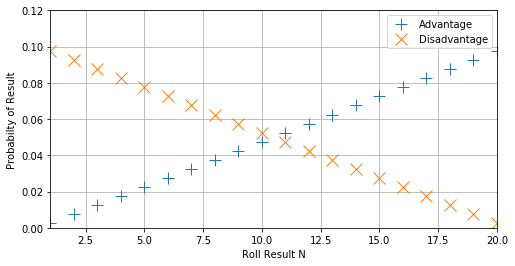

In [2]:
def advantage(N):
    return (float(N)-1)/200. + 1./400.

def disadvantage(N):
    return (20.-float(N))/200. + 1./400.

advantage_results = []
advantage_expectation = 0.
disadvantage_results = []
disadvantage_expectation = 0.
N_values = []

for i in np.arange(20):
    advantage_results.append(advantage(i+1))
    advantage_expectation += float(i+1)*advantage(i+1)
    disadvantage_results.append(disadvantage(i+1))
    disadvantage_expectation += float(i+1)*disadvantage(i+1)
    N_values.append(i+1)
    
print('Expectation of advantage:',
      np.round(advantage_expectation,3))
print('Expectation of disadvantage:',
      np.round(disadvantage_expectation,3))
print('Confirm probs. sum to 1 for advantage: ',
      np.round(sum(advantage_results),5) == 1.)
print('Confirm probs. sum to 1 for disadvantage: ',
      np.round(sum(disadvantage_results),5) == 1.)
plt.figure(figsize = (8,4))
plt.plot(N_values, advantage_results, 
         marker = '+', ls = 'None', markersize= 12, label = 'Advantage')
plt.plot(N_values, disadvantage_results,
         marker = 'x', ls = 'None', markersize= 12, label = 'Disadvantage')
plt.legend()
plt.xlabel('Roll Result N')
plt.ylabel('Probabilty of Result')
plt.grid()
plt.xlim([1,20])
plt.ylim([0.,.12])
plt.show();

## Looking at Advantage of Disadvantage (AoD)

Now we can look at the more interesting case of finding the probability of result N when rolling AoD, $P_{AOD}(N)$. Now remember, in this case we roll a total of four dice, where we take the disadvantage result of the first two, then take the disadvantage result of the second two, and then take the higher of those results. It's useful to note that we can consider this case conceptually as rolling two loaded "dice" at advantage, where each die's results are independent and identically distributed according to $f_{DIS}(N)$. Let's call these two imaginary results $A_{DIS}$ and $B_{DIS}$.

We can just copy the work for the vanilla advantage case, but replace A and B with $A_{DIS}$ and $B_{DIS}$! The events that give a result of N are: (i) $\{A_{DIS} = N, B_{DIS} < N\}$, (ii) $\{A_{DIS} < N, B_{DIS} = N\}$, or (iii) $\{A_{DIS} = B_{DIS} = N\}$. The probability of an event in set (i) occuring is
$$ P(A_{DIS} = N) \sum_{k=1}^{N-1}P(B_{DIS}=k) = f_{DIS}(N) \sum_{k=1}^{N-1}f_{DIS}(k) $$
... which is identical to the probabilty of an event from set (ii). For set (iii), we have
$$ P(A_{DIS} = N)P(B_{DIS} = N) = f_{DIS}(N)^2 $$ 
Adding all these together, we have that AoD results are distributed with probabilty mass function
$$ f_{AOD}(N) = f_{DIS}(N)^2 + 2 f_{DIS}(N) \sum_{k=1}^{N-1}f_{DIS}(k). \; \; \mathrm{(Equ. 3)} $$ 
... and the expected result of this role is simply $E[f_{AOD}(N)] = \sum_{N=1}^{20}Nf_{AOD}(N)$.

## Looking at Disadvantage of Advantage (DoA)

The pattern continues for $P_{DOA}(N)$: let's consider this a disadvantage roll of two "dice" loaded to be independent and identically distributed according to $f_{ADV}(N)$. Let $A_{ADV}$ and $B_{ADV}$ denote the results of these two loaded dice. So we have that the events that give a result of N lie in the sets: (i) $\{A_{ADV} = N, B_{ADV} > N\}$, (ii) $\{A_{ADV} > N, B_{ADV} = N\}$, or (iii) $\{A_{ADV} = B_{ADV} = N\}$. The probability of an event in set (i) occuring is
$$ P(A_{ADV} = N) \sum_{k=N+1}^{20}P(B_{ADV}=k) = f_{ADV}(N)\sum_{k=N+1}^{20}f_{ADV}(k). $$
... which is, following the pattern, identical to the probability of an event from set (ii). For set (iii), we have
$$ P(A_{ADV} = N)P(B_{ADV} = N) = f_{ADV}(N)^2 $$
... and so adding this up we have the probability mass function for DoA results:
$$ f_{DOA}(N) = f_{ADV}(N)^2 + 2 f_{ADV}(N) \sum_{k=N+1}^{20}f_{ADV}(k). \; \; \mathrm{(Equ. 4)} $$ 
... and the expected result of this role is simply $E[f_{DOA}(N)] = \sum_{N=1}^{20}Nf_{DOA}(N)$.

## Visualizing AoD and DoA

Let's plot some of these results:

[0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0]
Expectation of AoD: 9.833
Expectation of DoA: 11.167
Confirm probs. sum to 1 for AoD:  True
Confirm probs. sum to 1 for DoA:  True


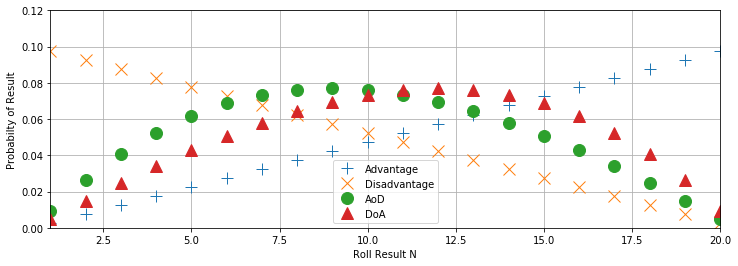

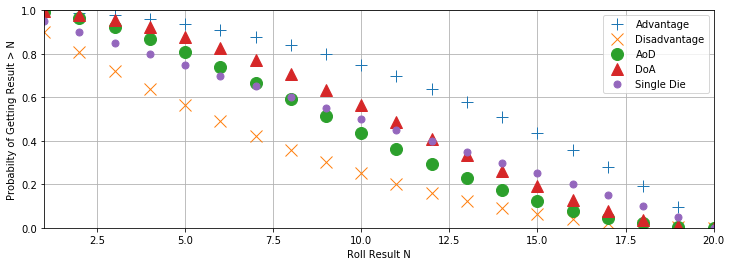

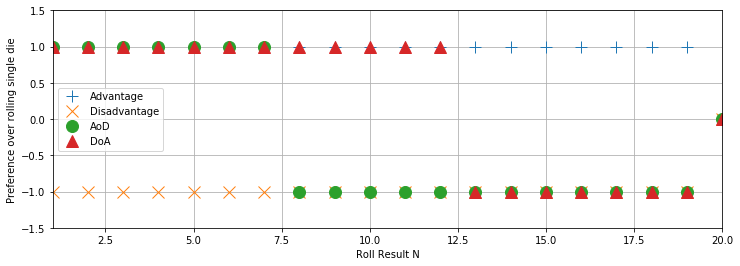

In [11]:
def aod(N):
    x1 = 0.
    for k in np.arange(N-1):
        x1 += disadvantage(k+1)
    return disadvantage(N)*x1*2. + disadvantage(N)**2

def doa(N):
    x1 = 0.
    for k in np.arange(N,20):
        x1 += advantage(k+1)
    return advantage(N)*x1*2. + advantage(N)**2

aod_results = []
aod_expectation = 0.
doa_results = []
doa_expectation = 0.
N_values = []

for i in np.arange(20):
    aod_results.append(aod(i+1))
    aod_expectation += float(i+1)*aod(i+1)
    doa_results.append(doa(i+1))
    doa_expectation += float(i+1)*doa(i+1)
    N_values.append(i+1)
    
# get cumulative results to see the probability of getting "better than N" for each case:
advantage_p_better_than_N = []
disadvantage_p_better_than_N = []
aod_p_better_than_N = []
doa_p_better_than_N = []
die_p_better_than_N = []

for i in np.arange(20):
    advantage_p_better_than_N.append(sum(advantage_results[i+1:]))
    disadvantage_p_better_than_N.append(sum(disadvantage_results[i+1:]))
    aod_p_better_than_N.append(sum(aod_results[i+1:]))
    doa_p_better_than_N.append(sum(doa_results[i+1:]))
    die_p_better_than_N.append((20.-(i+1))/20.)
    
print(die_p_better_than_N)

print('Expectation of AoD:',
      np.round(aod_expectation,3))
print('Expectation of DoA:',
      np.round(doa_expectation,3))
print('Confirm probs. sum to 1 for AoD: ',
      np.round(sum(aod_results),5) == 1.)
print('Confirm probs. sum to 1 for DoA: ',
      np.round(sum(doa_results),5) == 1.)

plt.figure(figsize = (12,4))
plt.plot(N_values, advantage_results, 
         marker = '+', ls = 'None', markersize= 12, label = 'Advantage')
plt.plot(N_values, disadvantage_results,
         marker = 'x', ls = 'None', markersize= 12, label = 'Disadvantage')
plt.plot(N_values, aod_results, 
         marker = 'o', ls = 'None', markersize= 12, label = 'AoD')
plt.plot(N_values, doa_results,
         marker = '^', ls = 'None', markersize= 12, label = 'DoA')
plt.legend()
plt.xlabel('Roll Result N')
plt.ylabel('Probabilty of Result')
plt.grid()
plt.xlim([1,20])
plt.ylim([0,.12])
plt.show();

plt.figure(figsize = (12,4))
plt.plot(N_values, advantage_p_better_than_N, 
         marker = '+', ls = 'None', markersize= 12, label = 'Advantage')
plt.plot(N_values, disadvantage_p_better_than_N,
         marker = 'x', ls = 'None', markersize= 12, label = 'Disadvantage')
plt.plot(N_values, aod_p_better_than_N, 
         marker = 'o', ls = 'None', markersize= 12, label = 'AoD')
plt.plot(N_values, doa_p_better_than_N,
         marker = '^', ls = 'None', markersize= 12, label = 'DoA')
plt.plot(N_values, die_p_better_than_N,
         marker = '.', ls = 'None', markersize= 14, label = 'Single Die')
plt.legend()
plt.xlabel('Roll Result N')
plt.ylabel('Probabilty of Getting Result > N')
plt.grid()
plt.xlim([1,20])
plt.ylim([0,1])
plt.show();

plt.figure(figsize = (12,4))
plt.plot(N_values, [np.sign(advantage_p_better_than_N[k] - die_p_better_than_N[k])
                    for k in range(20)], 
         marker = '+', ls = 'None', markersize= 12, label = 'Advantage')
plt.plot(N_values, [np.sign(disadvantage_p_better_than_N[k] - die_p_better_than_N[k])
                    for k in range(20)], 
         marker = 'x', ls = 'None', markersize= 12, label = 'Disadvantage')
plt.plot(N_values, [np.sign(aod_p_better_than_N[k] - die_p_better_than_N[k])
                    for k in range(20)],  
         marker = 'o', ls = 'None', markersize= 12, label = 'AoD')
plt.plot(N_values, [np.sign(doa_p_better_than_N[k] - die_p_better_than_N[k])
                    for k in range(20)], 
         marker = '^', ls = 'None', markersize= 12, label = 'DoA')
# plt.plot(N_values, die_p_better_than_N,
#          marker = '.', ls = 'None', markersize= 14, label = 'Single Die')
plt.legend()
plt.xlabel('Roll Result N')
plt.ylabel('Preference over rolling single die')
plt.grid()
plt.xlim([1,20])
plt.ylim([-1.5,1.5])
plt.show();

## How should you negotiate with your DM?

Well, if your DM decides to allow AoD and DoA rolls, it's in your best interest to argue for a DoA roll. The probability of beating any difficulty class (DC) with DoA beats the probability of beating that same DC with AoD. Of course, straight advantage is still the best bet if you can swing it. Further, if you need a result of 13 or greater, you'd be better off arguing for a straight die roll rather than DoA.

It's intuitive that the expectations of AoD and DoA are both pretty close to the expectation of a vanilla roll of the d20. As expected, the advantages and distadvantages do *almost* cancel out, which justifies Wizard of the Coast's decision to make this the rule as written. Still, there's enough of a difference to keep rules lawyers busy on the forums.